

## Regression Metrics

**The Process of Data Science**
1. Problem Statement
1. Key Metrics
1. Data Gathering
1. Data Cleaning/Munging
1. EDA
1. Modeling
1. Reporting
    - Model evaluation will mostly be used in steps 4 and 5.

### Regression Metrics
We're going to go through six different regression metrics.  However, we will talk most about **MSE** and **$R^2$**.
1. Mean Squared Error
1. Root Mean Squared Error
1. Median and Mean Absolute Error
1. $R^2$

## Metric Characteristics

In machine learning we use metrics to evaluate the quality of our predictions produced by our models.  The first area of supervised learning we're learning about is regression.  The general characteristics we might evaluate our regression predictions are:

### Residual error

Residual error is a fundamental building block we use to describe "error" in other metrics we will encounter.

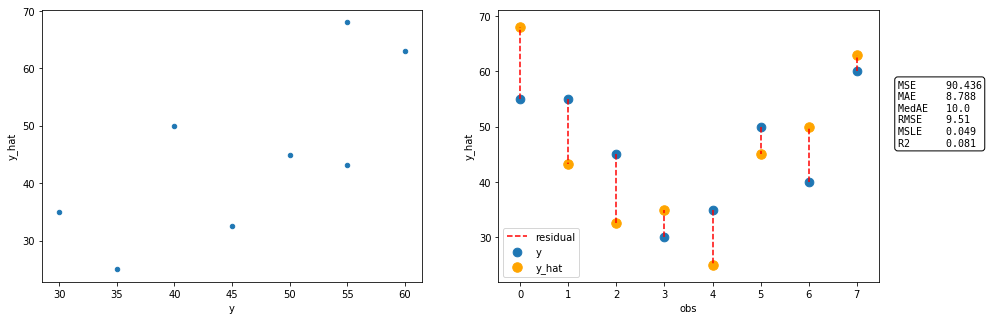


## $\text{true value - predicted value} = y - \hat{y}$

### Squared error

Generally, most regression metrics measure the difference between $y$ (true) and $\hat{y}$ (prediction) in some way. 

When we square any error (residual), it's done because no matter if the error is positive or negative, the result is always positive.  

- Larger error values when using squared error
> **Interal Model Optimization**
>
>
> Supervised ML models sometimes use types of squared error to optimize predictions.
    - Squared error is more differentiatable when used for optimization
    - Partial derivitives easy to solve when compared to 0 (absolute error is not good for this reason)

`/poll "Are we still in the same unit for squared error?" "Yes totally" "No not at all" "I'm not sure" anonymous`

### Absolute error

Absolute error we use when we want to be more precise about what we're describing in terms of error. An excellent use would be if you wanted to know exactly the money value of mispredictions.


##### Case 1: Over prediction

- Actual value = \$35
- Predicted value = \$44
- Residual error = -9
- **Absolute error = 9**

##### Case 2: Under prediction

- Actual value = \$35
- Predicted value = \$26
- Residual error = 9
- **Absolute error = 9**

In [1]:
import numpy as np
y = np.array([90, 94, 112, 103])
y_hat = np.array([95, 95, 115, 400])

rss = 0
for i in range(4):
    error = (y[i] - y_hat[i])**2
    print(error)
    rss += error
print('\n')
print(rss)

np.sum((y - y_hat) ** 2)

25
1
9
88209


88244


88244

In [2]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import pandas as pd

from matplotlib import pyplot as plt

from plot_scores import plot_scores

%matplotlib inline

In [3]:
fires = pd.read_csv("data/forestfires.csv")

In [4]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
fires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [7]:
X = fires[["FFMC","DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]]
y = fires["area"]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# option 1
list(zip(X.columns, model.coef_))

pd.DataFrame({
    'feature': X.columns,
    'coef': model.coef_.round(4)
})

,coef,feature
0,-0.0233,FFMC
1,0.0765,DMC
2,-0.0057,DC
3,-0.6984,ISI
4,0.8480,temp
5,-0.1963,RH
6,1.5271,wind
7,-2.5400,rain


In [8]:
X[0:1]
# -0.02 * 86.2 + 26.2 * 0.07 + 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0


In [9]:
X[0:1].shape

(1, 8)

In [10]:
X[0:1].values

array([[86.2, 26.2, 94.3,  5.1,  8.2, 51. ,  6.7,  0. ]])

In [11]:
X.iloc[0]

FFMC    86.2
DMC     26.2
DC      94.3
ISI      5.1
temp     8.2
RH      51.0
wind     6.7
rain     0.0
Name: 0, dtype: float64

In [12]:
X.iloc[0].values

array([86.2, 26.2, 94.3,  5.1,  8.2, 51. ,  6.7,  0. ])

In [13]:
X.iloc[0].values.shape

(8,)

In [14]:
i = 14
model.predict(X[i:i+1])

array([25.25457174])

In [15]:
X[0:1].to_dict(orient='list')

{'DC': [94.3],
 'DMC': [26.2],
 'FFMC': [86.2],
 'ISI': [5.1],
 'RH': [51],
 'rain': [0.0],
 'temp': [8.2],
 'wind': [6.7]}

In [16]:
dmc = 70

In [17]:
new = pd.DataFrame({
    'FFMC': [76],
    'DMC': [70],
    'DC': [70],
    'ISI': [5],
    'temp': [25],
    'RH': [20],
    'wind': [3.0],
    'rain': [4]
})

new

,DC,DMC,FFMC,ISI,RH,rain,temp,wind
0,70,70,76,5,20,4,25,3.0


In [18]:
model.predict(new)

array([49.02312636])

#### Mean Squared Error

$$MSE(\mathbf{y},\hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
> - $n$ = number of observations
> - $y$ = true values
> - $\hat{y}$ = predicted values (from model)
> - $i$ = The $i_{th}$ observation

##### ![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

Goal: Get $MSE$ as close to 0 as possible.

Pros: 
- Very common; part of other calculations.
- Represents average distance squared from the predicted value.

Cons: 
- Can be heavily affected by outliers.
- Not in the original units of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

In [19]:
fires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [20]:
from sklearn.metrics import mean_squared_error

y_hat = model.predict(X)
mean_squared_error(y, y_hat)

3979.4660161937195

#### Root Mean Squared Error

$$RMSE(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> - $n$ = number of observations
> - $y$ = true values
> - $\hat{y}$ = predicted values (from model)
> - $i$ = The $i_{th}$ observation

Goal: Get $RMSE$ as close to 0 as possible.

Pros: 
- Pretty common; part of other calculations.
- Represents (approximately) average distance from the predicted value.
- In the original units of $Y$.

Cons: 
- Can be heavily affected by outliers.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

There's no documentation, but it should be quite easy to generate the value.

In [21]:
import numpy as np

# A: square root the mean squared error
np.sqrt(mean_squared_error(y, y_hat))

63.0830089342108

In [22]:
(25 - 1090)**2

1134225

In [23]:
fires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


#### Mean (and Median) Absolute Error

$$
MEA(\mathbf{y},\hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^n{\left|y_i-\hat{y_i}\right|}
$$

$$MedAE(\mathbf{y},\hat{\mathbf{y}}) = \text{median}\left(\left|y_1-\hat{y}_1\right|,\ldots ,\left|y_n-\hat{y}_n\right|\right)$$


Goal: Get $MedAE$ and/or $MAE$ as close to 0 as possible.

**MAE** and **MedAE**
Pros:
- In the original units of $Y$. 
- Both less sensitive to outliers than MSE and RMSE
   - **MAE** less sensitive to outliers than **MSE**
   - **MedAE** less sensitive than **MAE, MSE, and RMSE**

Cons: 
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

In [24]:
from sklearn.metrics import median_absolute_error, mean_absolute_error

# Median absolute error
median_absolute_error(y, y_hat)

12.422110663999934

In [25]:
# mean absolute error
mean_absolute_error(y, y_hat)

19.287666647502647

#### Coefficient of Determination, $R^2$

$$R^2 = \frac{\text{Explained variance}}{\text{Total variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

##### Explained Variance

$\sum_{i=1}^n(y_i - \hat{y}_i)^2$

- $y_i = \text{each individual y value}$
- $\hat{y}_i = \text{the predicted value of y from our model}$

This is our squared error showing up again.  The sum of squared _residual error_:  $(\text{true values} - predictions)^2$.

> Example: $\text{(The price of homes - the $\hat{predicted}$ price of homes)}^2$.

##### Total Variance

${\sum_{i=1}^n(y_i - \bar{y})^2}$

- $y_i = \text{each individual y value}$
- $\bar{y} = \text{the mean of y values}$

The squared difference between **actual values** and the **mean** (in this case $y$).  Total variance is a fancy way of saying "the variance of $y$".  Variance is a measure that describes how spread out each individual value differs from the mean.

> Example: $\text{(The price of homes - the mean $\bar{price}$ of homes)}^2$.

Goal: Get $R^2$ as close to 1 as possible.

> - score = 0: Model explains none of the variability of the response data around its mean.  Imprecise predictions.
> - score = 1: Model explains all the variability of the response data around its mean.  More precicse predictions.

Pros:
- Easy interpretation. "An $R^2$ value of 0.8 means that 80% of the variability in the data are explained by our model, relative to a model with no predictors."
- Common metric.
- Does not depend on the scale of $Y$.
- Works with more than just _linear_ regression.

Cons:
- As you add more variables, $R^2$ will never decrease (with linear regression). Adjusted R2 can handle this assumption better (see additional metrics notebook).

> Are low $R^2$ scores bad?
>
> I'm glad you asked!  Not everything in regression is about getting the best predictions.  In some fields, such as human behavior, you would expect to achieve scores much lower then %50!  For inference, perhaps .3 is enough to measure an effect then reported reliably!  Yes, there is more to machine learning than prediction.  Inference can be the goal as well!

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [26]:
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MDEV'] = data['target']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
X = df[["CRIM", "CHAS", "NOX", "AGE"]]
y = df['MDEV']

model = LinearRegression()
model.fit(X, y)

# time permitting: code R2 by hand
# (y - y_hat) ** 2 / (y - y.mean()) ** 2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Show model score vs r2_score
model.score(X, y)

0.27958630516386795

In [29]:
y_hat = model.predict(X)

In [30]:
from sklearn.metrics import r2_score

r2_score(y, y_hat)

0.27958630516386795

In [31]:
np.sqrt(mean_squared_error(y, y_hat))

7.798525781639089

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Feature Selection with $R^2$ - Briefly

Slightly different from feature engineering is **feature selection**. Feature selection is (unsurprisingly) the process by which we select which features to include in our model.

- Suppose we have five features. How might we select which ones to include when modeling?
- Suppose we have five hundred features. How might we select which ones to include when modeling?

It is to our benefit to have an [automated means](http://scikit-learn.org/stable/modules/feature_selection.html) of identifying features to include/exclude.

#### Forward Selection
1. Start with null model (just $\hat{y} = \beta_0$).
2. Add one feature by testing all possible features $X_i$ and picking the **best** based on some metric.
3. Repeat until a stopping condition is met.

#### Backward Selection
1. Start with full model ($\hat{y} = \beta_0 + \beta_1X_1 + \cdots \beta_pX_p$).
2. Remove one feature by testing all possible features $X_i$ and picking the **worst** based on some metric.
3. Repeat step 2 until a stopping condition is met.

In [33]:
data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MDEV'] = data['target']

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['MDEV']

## Code up different model here to show effect of using all vs some variables, boston housing?

## score with X and y

In [34]:
# Reference coefficients if needed
# list(zip(X.columns, model.coef_))

## Conclusion
**MSE**
- Closer to 0 desirable
- MSE is a foundational metric that is used in many other metrics.
- Sensitive to outliers.
- Is in _squared error_ units: $error^2 = (y - \hat{y})^2$.


**RMSE**
- Closer to 0 desirable
- MSE but in original units of prediction.
- Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors.
- RMSE and MSE are useful when large residual errors are undesirable.

**MAE and MedAE**
- Closer to 0 desirable
- In original units of prediction.
- Less sensitive to outliers.
- **MAE** less sensitive than **MSE** and **RMSE** because error is not squared.
- **MedAE** is less sensitive to outliers than **MAE** because it uses the _median_ of aboslute errors rather than the _mean_.
- **MAE** and **MedAE** are easiest to interpret and are useful when large redisuals don't matter as much.

**$R^2$**
- Closer to 1 desirable
- Not scale dependent.
- Easy interpretation. "An  R2  value of 0.8 means that 80% of the variability in the data are explained by our model, relative to a model with no predictors."
- As you add more variables,  R2  will never decrease (with linear regression).

#### Case A: Model having low accuracy, and high variance between observation $y$ and prediction $\hat{y}$

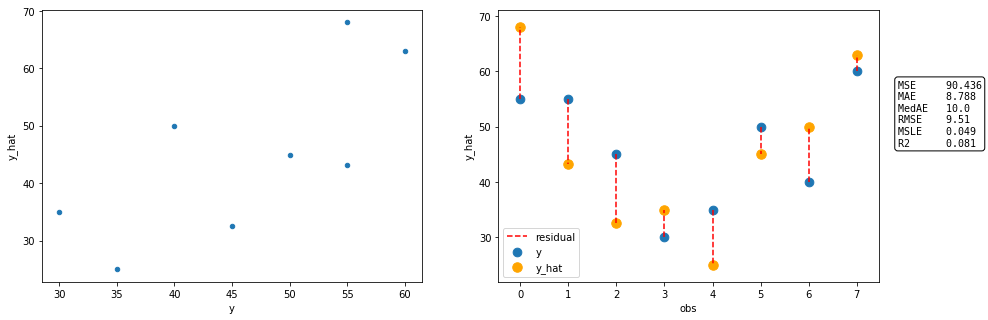

In [35]:
low_high = pd.DataFrame(
   [[55, 68], [55, 43.2], [45, 32.5], [30, 35], [35, 25], [50, 45],  [40, 50], [60, 63]],
   columns = ("y", "y_hat")
)

plot_scores(low_high, kind="line", residuals=True)

#### Case B: Model having high accurancy, but a one large residual between prediction $\hat{y}$ and observation $y$

In [36]:
# Decent model, however with one large outlier
single_outlier = pd.DataFrame(
   [[55, 56], [55, 55.6], [45, 45.5], [30, 31.3], [35, 35], [50, 49.89],  [25, 23.2], [70, 100.1]],
   columns = ("y", "y_hat")
)

#### Case C: Model having medicore accurancy

In [37]:
medium = pd.DataFrame(
   [[22, 28], [35, 29], [45, 32.5], [30, 35], [25, 35], [45, 49],[50, 55], [60, 63]],
   columns = ("y", "y_hat")
)

#### Case D: Model having mostly over-predicted values from observation

- Bonus:  Why the negative $R^2$?

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

In [38]:
over_predicted = pd.DataFrame(
   [[55, 70], [55, 75], [45, 65], [30, 10], [35, 15], [50, 70],  [40, 60], [60, 80]],
   columns = ("y", "y_hat")
)

#### Adjusted $R^2$
_We see this in packages like Statsmodels._

$$R^2_{adj} = 1 - \frac{\frac{1}{n-p-1}\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\frac{1}{n-1}\sum_{i=1}^n(y_i - \bar{y})^2}$$

Goal: Get $R^2_{adj}$ as close to 1 as possible.

$R^2_{adj}$ is a modified version of $R^2$ than can account for the number of predictors in the model. $R^2_{adj}$ increases only if the new term improves the model more than would be expected by chance.

Pros:
- Does not depend on the scale of $Y$.
- Penalizes for "bad" variables.

Cons:
- Interpretation isn't exactly the same, although we often treat it as such.

>  - n = sample size
>  - p = number of predictors / features / variables
>  - Always lower than R2!

#### Mean Squared Log Error
$$MSLE = \frac{1}{n}\sum_{i=1}^n\left(\log(\hat{y_i} + 1) - log(y_i + 1)\right) ^ 2$$

> Note: $\log(\cdot)$ in this case refers to the natural logarithm or the logarithm with base $e \approx 2.71828$. 
> - $n$ = number of observations
> - $y$ = true values
> - $\hat{y}$ = predicted values (from model)
> - $i$ = The $i_{th}$ observation

Goal: Get $MSLE$ as close to 0 as possible.

Pros: 
- If predicted and observed values are both large, their difference is likely going to be large as well. The logarithm helps to account for that scale.

Cons: 
- Not in the original values of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- $\log(0)$ is not defined.

> **From scikit-learn docs**
>
> "This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate."
> [Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error)